In [72]:
from sklearn.datasets import load_iris 
iris_dataset = load_iris()

In [73]:
# iris data set has key values 
print("key of iris_datasets \n{}".format(iris_dataset.keys()))

key of iris_datasets 
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [74]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [75]:
print("shape of data{}".format((iris_dataset['data'].shape)))

shape of data(150, 4)


In [76]:
iris_dataset['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [77]:
# train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0)
# we shuffle data before we split 
# to get every time same pseudorandom number generator we use 'random_state=0'

In [78]:
print("X_train shape: {}". format(X_train.shape))
print("y_train shape: {}". format(y_train.shape))

X_train shape: (112, 4)
y_train shape: (112,)


In [79]:
print("x_test shape:{}". format(X_test.shape))
print("y_test shape:{}". format(y_test.shape))

x_test shape:(38, 4)
y_test shape:(38,)


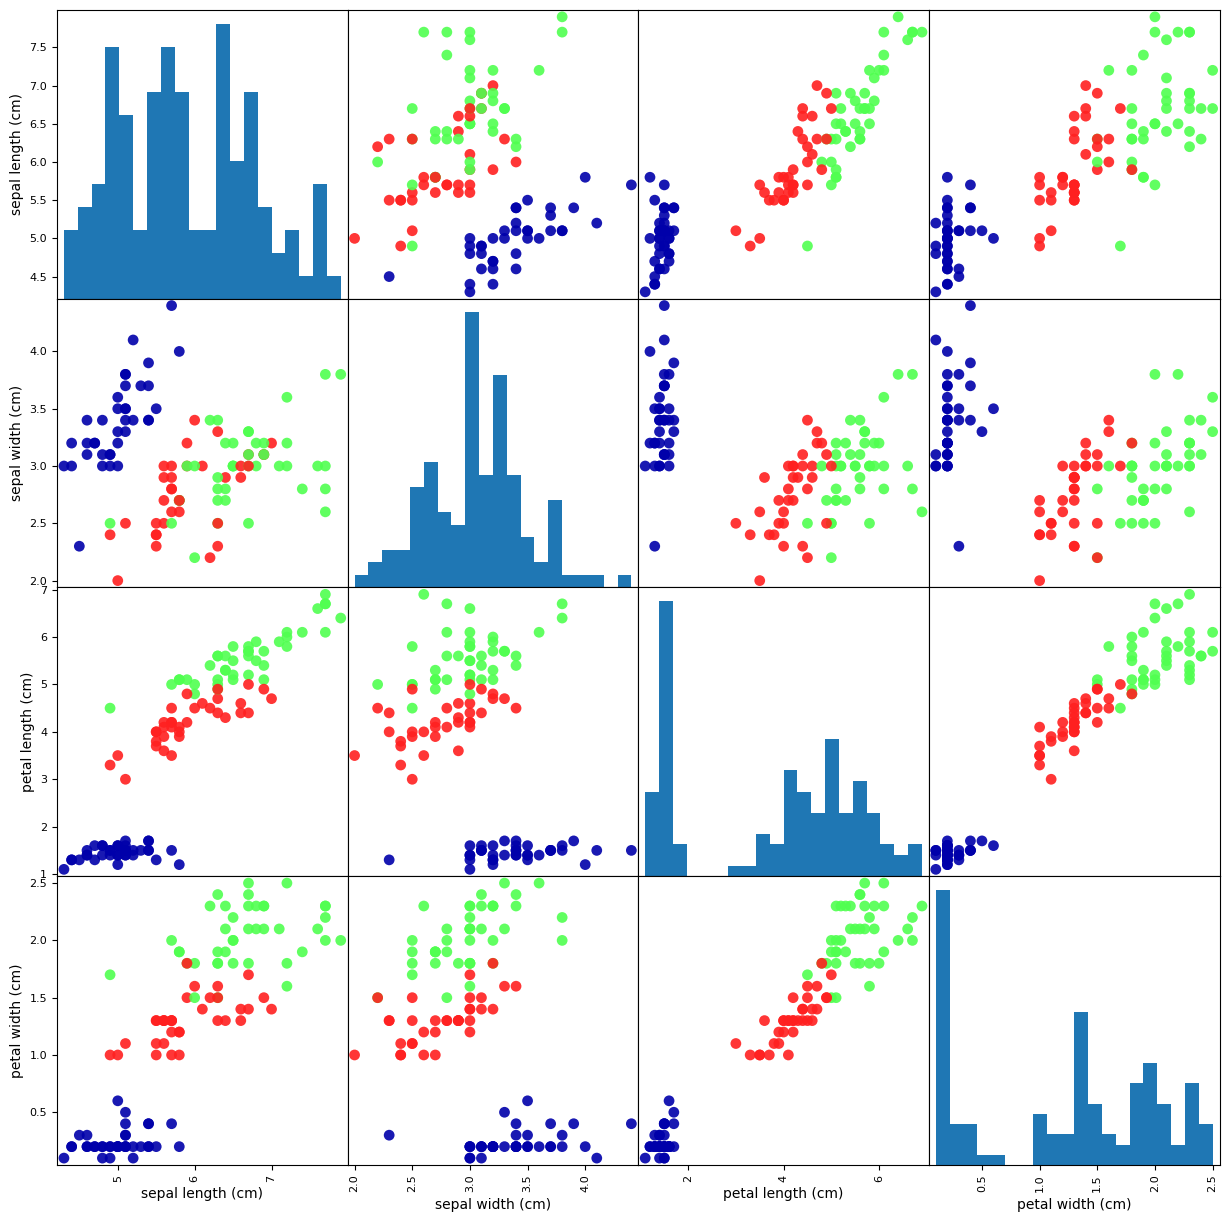

In [88]:
# visualization


from pandas.plotting import scatter_matrix
import mglearn
import pandas as pd

iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
gff = scatter_matrix(
    iris_dataframe,
    c=y_train,
    figsize=(15, 15),
    marker='o',
    s=60,              # move before hist_kwds
    alpha=0.9,
    cmap=mglearn.cm3,
    hist_kwds={'bins': 20}
)

In [94]:
# using KNN model
# to make predictions algorithm find the points in training set that is close to new point
# k sets the number of neighbors
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 1)
# knn just store the training data



In [98]:
# fit a model 
knn.fit(X_train, y_train)


,n_neighbors,1
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [104]:
# making predictions 
import numpy as np
x_new = np.array([[5, 2.9, 1, 0.2]])
print("x_new.shape {}". format(x_new.shape))


x_new.shape (1, 4)


In [112]:
# for prediction we call predict method
prediction = knn.predict(x_new)
print("prediction {}". format(prediction))
print("predict target name{}". format(iris_dataset['target_names'][prediction]))

prediction [0]
predict target name['setosa']


In [116]:
# Evalute the model by test set to checl model accuracy
y_pred = knn.predict(X_test)
print("Test set predictions \n {}".format(y_pred))

Test set predictions 
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [120]:
# test score
print("Test score {:.2f}".format(knn.score(X_test, y_test)))

Test score 0.97
